In [13]:
import torch
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline

In [3]:
x = torch.tensor(2.1, requires_grad=True)
loss = x ** 2
loss.backward()

In [5]:
print(x.grad)

tensor(4.2000)


In [24]:
x_data = torch.linspace(-5, 5, 200)
nu, sigma = torch.tensor(0.2), torch.tensor(1)
noise = torch.tensor([torch.normal(nu, sigma ) for _ in range(len(x_data))]) 
y_data = 2 * x_data - 1 + noise

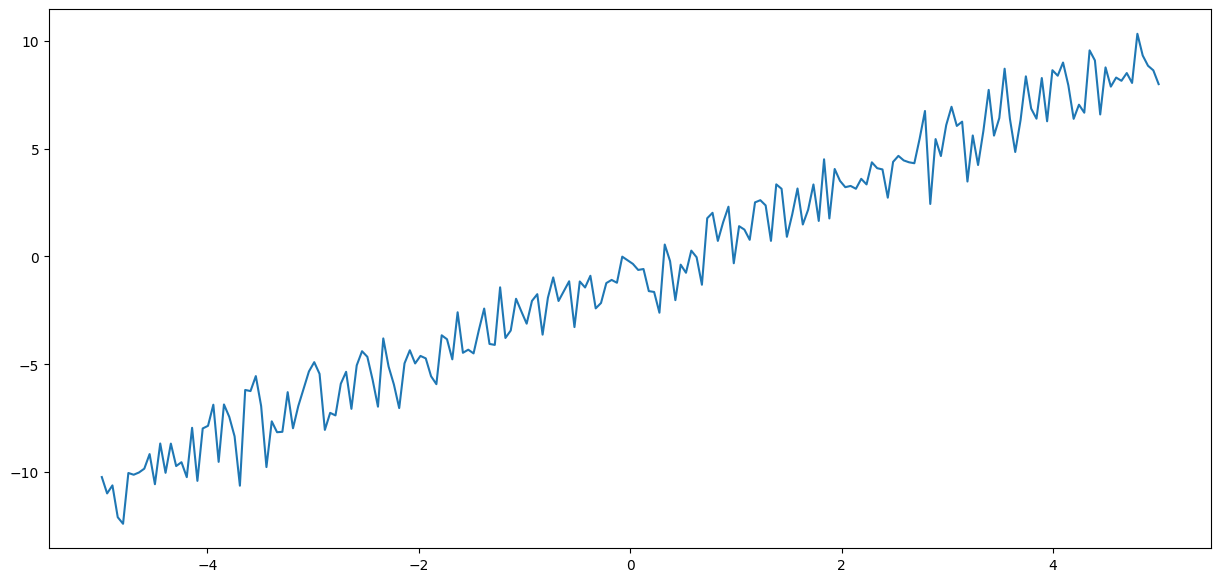

In [25]:
plt.figure(figsize=(15, 7))
plt.plot(x_data, y_data)

create a linear regressor

y = w * x_data + b

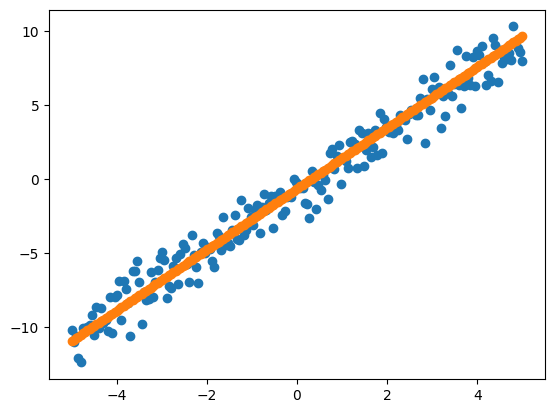

In [34]:
w = torch.tensor(0., requires_grad=True)
b = torch.tensor(0., requires_grad=True)
lr = 0.1
episode_n = 10
for _ in range(episode_n):
    y_pred = w * x_data + b
    loss = torch.mean((y_pred - y_data) ** 2)
    loss.backward()
    w.data = w.data - lr * w.grad
    b.data = b.data - lr * b.grad
    w.grad.zero_()
    b.grad.zero_()
    
plt.scatter(x_data.numpy(), y_data.numpy())
plt.scatter(x_data.numpy(), y_pred.detach().numpy())